In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.optimizers import Adam
import numpy as np

train = "Data/readelf/9/train_dataset.npz"
val = "Data/readelf/9/val_dataset.npz"
test = "Data/readelf/9/test_dataset.npz"

# Load numpy array
training_dataset = np.load(train)
val_dataset = np.load(val)
test_dataset = np.load(test)

x_train = training_dataset['x']
y_train = training_dataset['y']

x_val = val_dataset['x'][:150]
y_val = val_dataset['y'][:150]

x_test = test_dataset['x']
y_test = test_dataset['y']

print("No. of seed files collected: 84")
print("Data collection of XY simulated to 1% sampling rate, Dataset split: 74/6/4")
samples, timesteps, chunksize = x_train.shape
print("No. of samples: " + str(samples) + ", No. of timesteps: " + str(timesteps) + ", Chunksize: " + str(chunksize))
print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, y_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


No. of seed files collected: 84
Data collection of XY simulated to 1% sampling rate, Dataset split: 74/6/4
No. of samples: 1950, No. of timesteps: 2560, Chunksize: 64
Training shape:  (1950, 2560, 64) (1950, 2560, 64)
Validation shape:  (150, 2560, 64) (150, 2560, 64)
Test shape:  (97, 2560, 64) (97, 2560, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(2560, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error')

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=200, #change accordingly
                    batch_size=30, #change accordingly
                    validation_data=(x_val, y_val),
                    shuffle=False)

# Save the model
model.save("/home/isa/FYPJ/Model/model9.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2560, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 1950 samples, validate on 150 samples
Epoch 1/200
1950/1950 [==============================] - 255s 131ms/step - loss: 0.0992 - val_loss: 0.0772
Epoch 2/200
1950/1950 [==============================] - 247s 127ms/step - loss: 0.0864 - val_loss: 0.0698
Epoch 3/200
1950/1950 [==============================] - 238s 122ms/step - loss: 0.0790 - val_loss: 0.0650
Epoch 4/200
1950/1950 [==============================] - 242s 124ms/step - loss: 0.0741 - val_loss: 0.0617
Epoch 5/200
1950/1950 [==============================] - 230s 118ms/step - loss: 0.0706 - val_loss: 0.0593
Epoch 6/200
1950/1950 [==============================] - 225s 115ms/step - loss: 0.0

1950/1950 [==============================] - 228s 117ms/step - loss: 0.0439 - val_loss: 0.0383
Epoch 73/200
1950/1950 [==============================] - 231s 118ms/step - loss: 0.0438 - val_loss: 0.0383
Epoch 74/200
1950/1950 [==============================] - 230s 118ms/step - loss: 0.0438 - val_loss: 0.0382
Epoch 75/200
1950/1950 [==============================] - 229s 117ms/step - loss: 0.0437 - val_loss: 0.0382
Epoch 76/200
1950/1950 [==============================] - 233s 120ms/step - loss: 0.0437 - val_loss: 0.0381
Epoch 77/200
1950/1950 [==============================] - 230s 118ms/step - loss: 0.0437 - val_loss: 0.0381
Epoch 78/200
1950/1950 [==============================] - 230s 118ms/step - loss: 0.0436 - val_loss: 0.0381
Epoch 79/200
1950/1950 [==============================] - 230s 118ms/step - loss: 0.0436 - val_loss: 0.0380
Epoch 80/200
1950/1950 [==============================] - 229s 117ms/step - loss: 0.0436 - val_loss: 0.0380
Epoch 81/200
1950/1950 [=================

1950/1950 [==============================] - 227s 117ms/step - loss: 0.0430 - val_loss: 0.0375
Epoch 148/200
1950/1950 [==============================] - 230s 118ms/step - loss: 0.0430 - val_loss: 0.0375
Epoch 149/200
1950/1950 [==============================] - 228s 117ms/step - loss: 0.0430 - val_loss: 0.0375
Epoch 150/200
1950/1950 [==============================] - 231s 118ms/step - loss: 0.0430 - val_loss: 0.0375
Epoch 151/200
1950/1950 [==============================] - 230s 118ms/step - loss: 0.0430 - val_loss: 0.0375
Epoch 152/200
1950/1950 [==============================] - 229s 117ms/step - loss: 0.0430 - val_loss: 0.0375
Epoch 153/200
1950/1950 [==============================] - 232s 119ms/step - loss: 0.0430 - val_loss: 0.0375
Epoch 154/200
1950/1950 [==============================] - 227s 117ms/step - loss: 0.0430 - val_loss: 0.0375
Epoch 155/200
1950/1950 [==============================] - 234s 120ms/step - loss: 0.0430 - val_loss: 0.0375
Epoch 156/200
1950/1950 [========

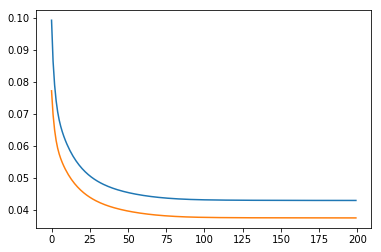

In [3]:
from matplotlib import pyplot
%matplotlib inline

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

In [4]:
test_loss = model.evaluate(x_test, y_test)

print("Test loss:", test_loss)

97/97 [==============================] - 4s 37ms/step
Test loss: 0.04623737040791986


In [5]:
x_predict = test_dataset['x'][:1]
prediction = model.predict_classes(x_predict, verbose=1)

1/1 [==============================] - 1s 944ms/step


In [6]:
print(prediction)

[[30 31  5 ... 34 34 34]]


In [7]:
predictions = model.predict(x_predict)
print(predictions[0][0]) # 1
print(predictions[0][1]) # 2 (1st row)
print(predictions[0][2]) # 1
print(predictions[0][3]) # 2 (2nd row)
print(predictions[0][4]) # 1
print(predictions[0][5]) # 2 (3rd row)
print(predictions[0][6]) # 1
print(predictions[0][7]) # 2 (4th row)
print(predictions[0][8]) # 1
print(predictions[0][9]) # 2 (5th row)
print(predictions[0][10])# 1
print(predictions[0][11])# 2 (6th row)
print(predictions[0][12])# 1
print(predictions[0][13])# 2 (7th row)
print(predictions[0][14])# 1
print(predictions[0][15])# 2 (8th row)
print(predictions[0][788])# 1
print(predictions[0][789])# 2 (OFFSET 0xC50)

[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.01395514e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.97720691e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.33631976e-07  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -8.48276215e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.21634266e-07  0.00000000e+00
  0.00000000e+00  0.00000